## [1] Bag of Words(BoW)

### 1.1 Basic

In [3]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:        
        if word not in word_to_index.keys():  # 단어가 처음 나왔을 경우
            word_to_index[word] = len(word_to_index)  
            bow.insert(len(word_to_index) - 1, 1)
            
        else:                                 # 단어가 다시 나왔을 경우 무조건 1
            index = word_to_index.get(word)
            print(word, type(word_to_index))
            bow[index] = bow[index] + 1
                    
    return word_to_index, bow
    
    
# 단어가 몇번 나왔나

    
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [4]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

을 <class 'dict'>
vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [5]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
소비자 <class 'dict'>
하는 <class 'dict'>
물가상승률 <class 'dict'>
을 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### 1.2 BOW-CountVectorizer 

In [6]:
# CountVectorizer : 띄어쓰기만으로 토큰화 진행
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 빈도수 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 단어의 인덱스
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### 1.3 BOW-불용어 제거(사용자 정의 불용어)
- BOW 쓰는 이유: 횟수로 중요한 단어 찾아내는거, 횟수 작은거 불용어로 들어가게 하는거

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [8]:
# 사용자정의 불용어 적용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### 1.4 BOW-불용어 제거(CountVectorizer 포함된 불용어)

In [9]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


### 1.5 BOW-불용어 제거(NLTK 포함된 불용어)

In [10]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")

vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## [2] 문서 단어 행렬(Document-Term Matrix, DTM)
- 문제점 : 0 이 많다, 단어텀이 많다

### 2.1 데이터 다운로드

In [11]:
# colab : wget -c https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx

In [12]:
!pip install wget

In [13]:
# windows일 경우
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

100% [..............................................................................] 55772 / 55772

'imdb.xlsx'

### 2.1 데이터 열기

In [16]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)

In [17]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [18]:
df.shape

(748, 2)

### 2.2 TDM 만들기

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features : 빈도순으로 최대 500단어까지 포함
# stop_words='english' : 불용어(관사, 전치사등을 제거)
cv = CountVectorizer(max_features=500, stop_words='english')

#숫자는 바꿔보고 잘 나오는걸로 하기

In [20]:
tdm = cv.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [21]:
tdm.shape

(748, 500)

### 2.3 단어 목록

In [22]:
# 단어 목록을 볼때는 tdm이 아니라 cv에 저장되어 있음
cv.get_feature_names()[:10]

C:\Users\virtue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [23]:
len(cv.get_feature_names())

500

### 2.5 단어별 총 빈도

In [24]:
tdm.sum(axis=0) # 열별 단어 수 

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [25]:
tdm.sum(axis=1) # 행별 단어 수 

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [26]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [27]:
type(tdm.sum(axis=0))

numpy.matrix

In [28]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [29]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


### 단어 빈도 저장

In [30]:
word_count.to_csv('word_count.csv')

## [3] 단어 구름(wordcloud) 

### wordcloud 설치

In [31]:
#아나콘다를 이용할 경우:
!conda install -y -c conda-forge wordcloud

#맥 또는 리눅스에서는 pip 명령어로 설치
!pip install wordcloud

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [32]:
!pip install wordcloud

### 데이터 불러오기

In [33]:
import pandas as pd

word_count = pd.read_csv('word_count.csv', index_col=0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


### 단어 구름

In [34]:
from wordcloud import WordCloud

#font_path: 글꼴의 경로
#max_words: 워드클라우드를 그릴 단어의 개수
#background_color: 배경색 설정
#width : 가로크기(픽셀 단위)
#height: 세로크기(픽셀 단위)
#배경은 흰색, 최대 100단어를 가로 400픽셀, 세로 300픽셀 크기로 단어 구름으로 그린다.
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [35]:
word_count.set_index('단어')

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [36]:
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [37]:
# dictionary로 만드는 방법1
count_dic = word_count.set_index('단어')['빈도'].to_dict()

count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [38]:
# dictionary로 만드는 방법2
dict(zip(word_count['단어'], word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [39]:
cloud = wc.fit_words(count_dic)

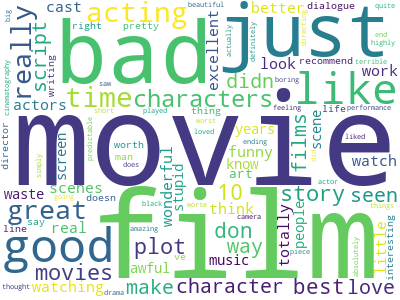

In [40]:
cloud.to_image()

In [41]:
cloud.to_file('cloud.png')

In [42]:
import os

os.getcwd()

'C:\\Users\\virtue\\Desktop\\Machine learning\\NLP'

## [4] TF-IDF

### 데이터 불러오기

In [43]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()


,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [45]:
tdm = tfidf.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [46]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [47]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(5)

C:\Users\virtue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## [5] 기존 TDM에서 변환

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])

In [50]:
from sklearn.feature_extraction.text import  TfidfTransformer

trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)
tdm3

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [51]:
# tf-idf 두 방법 비교
import numpy as np 

np.allclose(tdm.A, tdm3.A) #.하면 압축 푼형태로 되서 비교할 수 있다

True

## [6] 영어품사 태깅 & 표제어 추출

In [1]:
import spacy

# 영어 모형 불러오기
nlp = spacy.load("en_core_web_sm")

# 모형에 영어 텍스트 적용
text = "Wikipedia is maintained by volunteers."b
doc = nlp(text)

In [14]:
len(doc)

6

In [17]:
doc[0].text, doc[0].lemma_, doc[0].pos_

('Wikipedia', 'Wikipedia', 'PROPN')

In [4]:
for token in doc:   # token을 자른다 : ex) Wikipedia.text
    print(token.text, 
          token.lemma_,  # 표제어
          token.pos_,    # 단어의 품사
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계
          token.is_stop) # 불용어 여부

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


In [5]:
spacy.explain('PROPN')

'proper noun'

In [6]:
# 명사와 동사의 표제어로 단어 문서 행렬 만들기
def extract_nv(text):
    doc = nlp(text)
    words = []
    for token in doc:
        print(token.tag_) # 자세한 품사
        if token.tag_[0] in 'NV': # 0번째에 N,V 있니, 있는거만 추출해서 담겠다
            words.append(token.lemma_.lower())
    return words

In [7]:
extract_nv('Apple is a company') # 결과값 품사

NNP
VBZ
DT
NN


['apple', 'be', 'company']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, tokenizer=extract_nv)

In [10]:
import pandas as pd
df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
# tdm 만들기 , 아까 500개 자른거는 사전을 만든것, 이건 실제 뭐가 있는지?

tdm = cv.fit_transform(df['review'])

DT
RB
,
JJ
,
RB
RB
HYPH
VBG
,
JJ
NN
IN
DT
JJ
,
VBG
JJ
NN
.
_SP
RB
JJ
WP
VBD
RBR
VBN
:
DT
JJ
NNS
CC
DT
NN
,
RB
NN
IN
WP
VBD
RP
.
_SP
VBG
NN
IN
JJ
CC
JJ
CC
JJ
NN
NNS
,
DT
NN
VBN
,
VBD
RB
RBR
JJ
:
IN
DT
NN
VBD
JJ
CC
DT
NN
CC
NNS
RB
JJ
JJ
JJ
.
_SP
RB
JJ
NN
CC
NN
TO
VB
IN
.
_SP
DT
JJS
NN
IN
DT
NN
VBD
WRB
NNP
VBZ
VBG
TO
VB
DT
NN
WDT
VBZ
VBG
IN
PRP$
NN
.
_SP
DT
NN
IN
DT
NN
VBZ
NN
,
NN
,
VBG
NFP
IN
PRP
VBZ
IN
NN
,
PRP
VBZ
PRP
VBP
IN
PRP
VBZ
JJ
.
_SP
VBD
CD
NNS
.
_SP
VBD
DT
NN
NN
CC
VBD
PRP
VBD
DT
JJ
NN
,
JJ
NNS
IN
NNS
.
_SP
DT
NN
JJ
.
_SP
VBD
DT
NN
IN
NNP
NNP
IN
DT
NN
NN
.
_SP
CC
DT
NN
NNS
VBD
JJ
.
_SP
DT
NN
VBD
DT
NN
IN
NNP
IN
PRP
VBZ
JJS
,
VBD
PRP
VB
RB
JJ
.
_SP
DT
NNS
VBD
DT
JJS
CC
DT
NNS
VBD
RB
JJ
.
_SP
PRP
VBD
RB
JJ
.
_SP
DT
VBZ
DT
RB
``
JJ
IN
NN
''
NN
WDT
VBZ
NN
RB
RB
IN
PRP$
NN
.
_SP
PRP
VBD
DT
JJ
NN
IN
DT
JJ
NN
,
CC
PRP
VBD
DT
JJ
NN
IN
PRP
RB
MD
VB
.
_SP
DT
NN
VBZ
RB
JJ
,
IN
PRP
VBP
DT
NN
IN
CD
NNS
TO
VB
DT
JJ
JJS
NN
RB
VBD
.
_SP
PRP
MD
VB
DT
NN
RP
IN
DT
NN
IN
NNS
IN
NN
,
NN
,
NN
,
NN


NN
VBZ
IN
DT
NNS
IN
PRP
VBP
DT
NN
NNS
CC
NNS
-LRB-
CC
RB
JJ
HYPH
NNS
-RRB-
.
_SP
DT
VBZ
DT
JJ
NN
,
IN
JJ
NN
,
CC
JJ
NNS
.
DT
JJ
NN
VBN
IN
NNP
NNP
IN
NNS
WP
MD
RB
VB
NN
IN
DT
JJ
NNS
IN
VBG
.
DT
NN
VBN
IN
NNS
.
_SP
NN
VBZ
DT
JJ
JJ
NN
,
WDT
VBZ
NN
,
CC
VBZ
PRP
NN
IN
PRP
RB
VBP
NN
CC
NN
VBP
JJ
NNS
.
_SP
RB
,
PRP
VBP
UH
DT
NN
IN
PRP
VBZ
NN
IN
NNS
:
EX
VBZ
RB
JJ
NNS
RB
RB
IN
DT
CD
.
_SP
PRP$
NN
MD
VB
TO
VB
HYPH
NN
IN
NN
IN
DT
JJ
NN
IN
NN
HYPH
NN
.
_SP
PRP
VBD
VBN
VBN
IN
DT
NN
IN
VBG
DT
``
NN
''
CC
PRP
VBD
DT
JJ
CD
NNS
TO
RB
VB
.
_SP
DT
NN
RB
VBZ
NN
IN
DT
NNP
CC
NN
IN
NN
IN
DT
JJ
NN
IN
NN
NNS
.
_SP
PRP
RB
VBP
RB
VB
DT
NN
IN
DT
JJ
NN
.
_SP
PRP
VBP
DT
IN
DT
JJ
NN
.
_SP
DT
NN
VBZ
DT
VBG
NNS
.
_SP
NN
VBZ
JJ
.
_SP
NNP
NN
HYPH
NN
RB
VBZ
PRP
IN
DT
JJ
NN
JJ
,
FW
_SP
DT
NN
VBZ
IN
JJ
.
_SP
DT
NN
VBZ
_SP
VBD
EX
DT
NN
.
_SP
DT
NNS
VBP
JJ
.
_SP
DT
JJ
NN
VBZ
NN
HYPH
JJ
.
_SP
RB
IN
NN
IN
DT
NN
,
DT
VBZ
JJ
TO
NN
.
_SP
PRP
MD
RB
VB
PRP
RB
NNP
DT
VBZ
NN
.
_SP
RB
EX
MD
VB
DT
JJ
NN
IN
DT
NN
.
_SP
RB
DT
JJ
NN
IN


PRP
VBP
PRP
.
_SP
CD
_SP
DT
NN
VBZ
RB
,
RB
JJ
:
PRP
MD
VB
DT
NN
.
_SP
CD
_SP
PRP
VBP
RB
JJ
IN
VBG
DT
NN
IN
DT
.
_SP
CD
_SP
PRP
MD
RB
VB
PRP
RB
.
_SP
CD
_SP
PRP
VBZ
RB
RB
DT
NN
:
PRP
VBZ
DT
NN
NN
.
_SP
CD
_SP
WDT
VBZ
JJR
NN
CC
NN
IN
DT
NN
IN
PRP
.
_SP
CD
_SP
DT
NN
NNS
VBP
RB
JJ
CC
RB
JJ
IN
DT
NN
.
_SP
CD
_SP
DT
NN
VBZ
JJ
.
_SP
CD
_SP
DT
NN
NNS
VBP
JJ
,
NNS
VBG
IN
PRP
VBP
CD
NNS
JJ
,
NNS
NN
IN
NNS
WDT
VBP
CD
NNS
JJ
IN
DT
NN
,
FW
FW
_SP
CD
_SP
IN
DT
WDT
VBP
RB
VBN
PRP
,
VB
RB
VB
PRP$
NN
.
_SP
CD
_SP
TO
VB
DT
NN
DT
NN
VBZ
JJ
.
_SP
CD
_SP
VBD
VBG
DT
CC
VBD
RB
VB
IN
DT
IN
DT
NNS
.
_SP
CD
_SP
IN
JJ
DT
NN
IN
DT
NN
NN
CC
DT
NN
RB
VBD
RB
VB
IN
PRP
RB
RB
.
_SP
CD
_SP
PRP
VBD
DT
RB
JJ
NN
CC
PRP
VBD
PRP
DT
NN
IN
PRP
VBD
VBG
NN
RB
IN
DT
NN
.
_SP
CD
_SP
DT
NNS
VBD
RB
``
NNS
''
CC
DT
NN
VBD
DT
NN
IN
DT
NN
NN
.
_SP
CD
_SP
IN
DT
NN
DT
NN
NN
DT
NN
PRP
VBD
JJ
CC
VBD
RB
VB
WP
VBD
RB
CC
RB
PRP
VBD
RP
.
_SP
CD
_SP
JJ
PRP
VBD
RB
VB
TO
VB
PRP
.
_SP
CD
_SP
VBD
RB
VB
CC
RB
VB
RB
.
_SP
CD
_SP
CC
PRP
VBD
RB
NN
RB


UH
,
WP
DT
JJ
NN
.
_SP
RB
JJ
IN
DT
JJS
,
CC
RB
JJ
.
_SP
DT
NN
VBZ
RB
VB
RB
RB
RB
,
CC
DT
NN
VBZ
RB
JJ
.
_SP
RB
RB
JJ
IN
NN
NN
.
_SP
PRP
VBD
RB
VBG
NN
NN
,
CC
DT
.
_SP
PRP
MD
VB
TO
VB
DT
NN
IN
RB
JJ
NN
RB
TO
VB
IN
CD
VBG
.
_SP
DT
NN
-LRB-
CC
PRP
VBP
DT
NN
RB
-RRB-
VBZ
DT
NN
IN
DT
NN
HYPH
VBG
NN
.
_SP
IN
RB
NN
VBN
IN
PRP
VBD
WRB
TO
VB
RB
NN
.
_SP
DT
VBZ
DT
CD
IN
IN
CD
,
RB
IN
EX
VBZ
NN
JJR
.
_SP
DT
VBZ
CD
PRP
VBD
RB
VB
,
CC
PRP
VBD
PRP
RB
IN
NNP
NN
NN
,
CC
VBD
RB
JJ
.
_SP
PRP
VBP
PRP
VBD
DT
NN
NN
IN
JJ
NN
IN
PRP$
NNS
,
CC
DT
NN
VBD
RB
JJ
IN
DT
NN
.
_SP
NN
NN
VBD
RB
JJ
,
CC
JJ
NN
VBD
RB
JJ
.
_SP
VBG
DT
NNS
IN
NN
IN
NNP
CC
NNP
,
PRP
VBD
JJ
WRB
JJ
NN
EX
VBD
IN
NN
IN
DT
CD
IN
PRP
.
_SP
CC
DT
NN
IN
DT
NN
VBD
RB
JJ
:
IN
DT
NN
IN
DT
NNP
NNP
_SP
DT
NN
NN
NNS
VBD
RB
VBG
.
_SP
DT
JJ
NN
JJR
IN
NNP
POS
NN
VBD
NNP
POS
NN
.
_SP
WDT
DT
NN
VBD
VBG
IN
,
PRP
VBD
RB
.
_SP
PRP
VBD
RB
JJ
IN
DT
NN
PRP
VBD
.
_SP
PRP
VBD
WRB
PRP
VBD
DT
NN
WDT
RBR
JJ
NNS
VBD
TO
VB
IN
DT
JJ
NN
.
_SP
DT
JJ
CC
NN
JJ
NN
IN
JJ
NN
,
N

VBG
DT
CD
POS
NN
,
PRP
RB
VBD
DT
NN
CC
PRP
MD
RB
VB
IN
PRP
VBD
PRP
JJ
NN
CC
RB
JJR
IN
DT
JJ
NNP
NNS
.
_SP
CC
``
JJ
NNS
''
VBD
DT
CD
POS
NN
CC
VBD
CD
IN
DT
RBS
JJ
,
JJ
,
CC
JJ
NNS
RB
VBN
.
_SP
DT
NNS
VBP
JJ
CC
PRP
MD
RB
VB
IN
PRP
VBD
DT
JJ
NN
CC
NN
VBN
IN
DT
NN
.
_SP
RB
,
NN
JJ
NN
VBD
PRP
VB
IN
DT
JJ
NN
-LRB-
IN
VBG
IN
JJ
NNS
VBN
IN
NNS
-RRB-
.
_SP
DT
NNS
VBD
RB
JJ
CC
VBD
DT
NN
IN
RB
VBG
DT
JJ
NN
NN
.
_SP
DT
JJ
NN
VBD
JJ
CC
VBN
TO
VB
VBN
DT
NN
.
_SP
DT
NN
IN
DT
NN
VBD
RB
IN
DT
NN
,
RB
JJ
CC
VBD
IN
PRP
VBD
JJ
TO
VB
RP
.
_SP
PRP$
NNS
VBP
TO
VB
VBN
VBN
IN
DT
JJ
NN
JJ
,
IN
PRP
VBP
VBG
UH
RB
,
RB
JJ
TO
VB
IN
WRB
DT
JJ
NN
JJ
MD
RB
,
UH
,
PRP
VBP
,
UH
NFP
NN
.
_SP
NN
VBZ
DT
JJ
NN
NN
CC
VBZ
RB
RB
JJ
IN
NN
IN
DT
NN
.
_SP
EX
VBZ
RB
DT
NN
IN
NN
DT
RB
VBN
.
_SP
PRP
VBD
DT
NN
CC
PRP
VBD
DT
VBZ
DT
JJ
NN
.
_SP
WP
VBZ
RB
RBR
JJ
VBZ
DT
WP
VBD
VBN
DT
NN
IN
EX
MD
VB
DT
NN
IN
NNP
NNP
.
_SP
TO
VB
JJ
IN
PRP
,
DT
VBZ
JJ
NN
CC
RB
JJ
.
_SP
IN
NN
,
PRP
MD
RB
VB
IN
DT
NN
IN
DT
NN
IN
NNP
NNP
VBZ
NN
IN
NN
.
_SP
DT


RB
,
DT
NN
VBZ
RB
VBN
IN
JJ
NN
HYPH
NN
,
JJ
VBG
CC
JJ
NN
IN
NNP
NNP
NNP
RB
JJ
VBZ
DT
VBG
JJ
JJ
NN
WDT
VBZ
IN
PRP
VBZ
VBG
IN
DT
JJ
NN
.
_SP
PRP
VBZ
RB
JJ
NN
RB
CC
VBZ
RB
VBN
IN
NNS
IN
NNP
NNP
.
_SP
DT
NN
VBD
RB
JJ
IN
VBG
IN
DT
NN
.
_SP
PRP
VBD
DT
NN
NNP
NNP
POS
NN
VBD
JJ
TO
VB
RB
IN
NN
TO
VB
IN
PRP$
NN
.
_SP
DT
NN
VBZ
RB
VBG
.
_SP
RB
,
PRP
VBP
PRP
VBZ
IN
NNS
MD
VB
TO
VB
DT
NN
PRP
NN
IN
VBG
JJ
NNS
IN
NN
.
_SP
CC
PRP
VBD
JJ
.
_SP
PRP
VBP
RB
JJ
IN
NN
WDT
VBZ
RB
JJ
NN
,
CC
RB
PRP
VBP
RP
JJ
CC
RB
.
_SP
VB
DT
JJ
NN
IN
DT
NN
WDT
VBD
JJ
VBZ
WRB
DT
JJ
NN
VBZ
PRP$
NN
VBN
RP
.
_SP
PRP
VBZ
DT
JJ
,
JJ
,
CC
RB
JJ
NN
.
_SP
DT
JJ
NN
VBN
DT
``
DT
JJ
,
JJ
NN
,
''
CC
DT
VBZ
JJ
.
_SP
PDT
DT
NNS
VBP
DT
JJ
NN
,
RB
VB
NN
IN
NNP
NNP
,
WP
VBZ
IN
DT
JJ
NN
IN
DT
NN
IN
DT
JJ
NNS
PRP
VBZ
NN
IN
IN
DT
JJ
NN
.
_SP
PRP
VBP
DT
NN
IN
DT
JJ
JJ
NNS
IN
NNS
IN
DT
NN
,
CC
DT
NN
IN
DT
NN
NN
PRP
.
_SP
DT
NN
IN
NN
NNS
IN
DT
NN
CC
IN
DT
NN
WDT
VBZ
VBN
IN
PRP
IN
DT
``
VBG
NN
''
VBP
JJ
.
_SP
RB
DT
NN
IN
NNP
NN
VBZ
RB
DT
JJS
NN
PRP


NN
NNP
NN
VBZ
JJ
NN
TO
VB
NNS
IN
NN
,
CC
IN
IN
DT
JJ
NN
,
CC
JJ
NN
,
PRP
MD
RB
VB
WP
VBZ
VBG
TO
VB
RB
.
_SP
RB
,
VBP
RB
RB
VB
PRP$
NN
IN
DT
.
_SP
DT
NN
RB
VBZ
TO
VB
DT
JJ
NN
.
_SP
IN
IN
DT
NN
,
VBP
RB
VB
NN
JJ
CC
RB
RB
JJ
.
_SP
EX
VBZ
,
RB
,
DT
RB
JJ
NN
-LRB-
IN
JJS
,
IN
DT
NN
IN
NN
-RRB-
.
_SP
PRP
VBP
RB
JJ
CC
PRP
RB
MD
RB
VB
PRP
IN
NN
.
_SP
CD
IN
DT
RBS
JJ
,
JJ
NNS
PRP
VBP
RB
VBN
.
_SP
DT
JJ
NN
NN
VBZ
JJ
CC
PRP$
NN
IN
DT
JJ
NN
NN
VBZ
VBG
.
_SP
VBD
PRP
.
_SP
DT
VBZ
CD
IN
DT
JJS
NNP
NNP
NN
IN
NN
CD
CC
RB
PDT
RB
JJ
.
_SP
PRP
VBP
RB
VB
WRB
DT
NN
VBD
IN
DT
NNS
IN
DT
NN
NN
,
PRP
VBZ
RB
RB
DT
JJ
NN
.
_SP
PRP
RB
VBP
IN
NN
MD
RB
VB
DT
NN
.
_SP
DT
VBZ
RB
NN
HYPH
NN
.
_SP
DT
NN
VBZ
IN
VBG
JJ
NNS
VBG
RB
CC
VBG
IN
DT
NN
,
DT
VBZ
WRB
JJ
PRP
VBZ
.
_SP
RB
PRP
VBP
RB
TO
VB
PRP
:
VBP
RB
VB
DT
NN
,
PRP
VBZ
DT
JJS
NN
PRP
VBP
RB
VBN
.
_SP
PRP
VBD
DT
JJ
NN
IN
NNP
DT
JJ
NN
CC
RB
VBD
PRP
.
_SP
PRP
VBD
RB
VB
WRB
JJ
DT
JJ
RB
VBZ
IN
DT
JJ
CD
NNS
.
_SP
JJ
JJ
NN
.
_SP
RB
,
DT
NN
NNP
NNP
MD
VB
DT
JJ
IN
DT
NN
NN
N

In [12]:
# 빈도 순으로 정렬
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat

})

C:\Users\virtue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
wc.sort_values('빈도', ascending=False).head()

,단어,빈도
28,be,845
263,movie,211
126,film,189
166,have,119
92,do,112
